# 분석 2주차 과제

# 1. LinearRegression

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 단순선형회귀
list_y = []
# 1부터 20까지 X data를 만들어주었습니다.
X = np.arange(1,21) 
# X에 임의의 수를 더해 임의의 Y data를 만듭니다.
for x in X:
    list_y.append(x+np.random.randint(6))
Y = np.array(list_y)
df = pd.DataFrame({'X':X,'Y':Y})

In [3]:
# 데이터 확인
df

,X,Y
0,1,3
1,2,7
2,3,8
3,4,5
4,5,7
5,6,8
6,7,8
7,8,13
8,9,14
9,10,15


**LinearRegressoion을 이용하여 X data에 대해 학습을 진행한 후 직선의 방정식을 구해주세요.**

[답] :Y = 0.99097744*X + 3.194736842105261

In [4]:
# 모델 생성 후 학습시키기
linear_model = LinearRegression()
linear_model.fit(X.reshape(-1,1), Y)

LinearRegression()

In [5]:
# 회귀계수 구해보기
linear_model.coef_

array([0.99097744])

In [6]:
# 상수항 구해보기
linear_model.intercept_

3.194736842105261

**X data에 대해 예측을 수행한 후, 그래프를 통해 학습데이터와 회귀직선을 나타내보세요.**

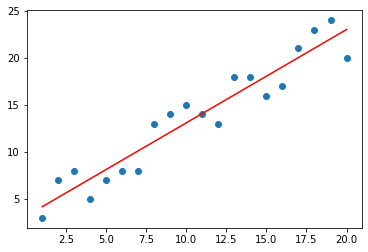

In [7]:
# X data에 대해 예측
pred = linear_model.predict(X.reshape(-1, 1))

# 점(학습데이터)들 찍어보기
plt.plot(X, Y, 'o')

# 회귀직선 그려보기
plt.plot(X, pred, 'r')

**회귀분석 평가지표 중 하나를 골라 구해보세요**
- MSE, RMSE, R2_score 등

In [9]:
# 여기에 구해보세요!
from sklearn.metrics import mean_squared_error
print("MSE :", mean_squared_error(Y, pred))

MSE : 3.287293233082707


# Logistic Regression

In [10]:
# 사이킷런의 데이터셋 로드
from sklearn.datasets import load_breast_cancer

In [11]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df["label"] = breast_cancer.target
df.columns = [ col.replace(" ", "_") for col in df.columns]

In [12]:
# 데이터가 잘 로드되었는지 확인해보세요
df.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'label'],
      dtype='object')

## **[변수 설명]** 
radius : 반경(중심에서 외벽까지 거리들이 평균값) <br>
texture : 질감 <br>
perimeter : 둘레 <br>
area : 면적 <br>
smoothness : 매끄러움 <br>
compactness : 조그만 정도<br>
concavity : 오목함(윤곽의 오목한 부분의 정도)<br>
points : 오목한 점의 수<br>
symmetry : 대칭<br>
dimension : 프랙탈 차원<br>

In [14]:
# 이번엔 mean이 들어간 변수만 사용해보겠습니다!
# mean이 들어간 변수만 따로 뽑아 X와 Y데이터를 만들어주세요.
cols = [col for col in df.columns if col[:4] == 'mean']

In [15]:
X = df[cols]
Y = df["label"]

In [16]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


**Heatmap을 통해 X변수 간 상관관계를 확인해보세요!**

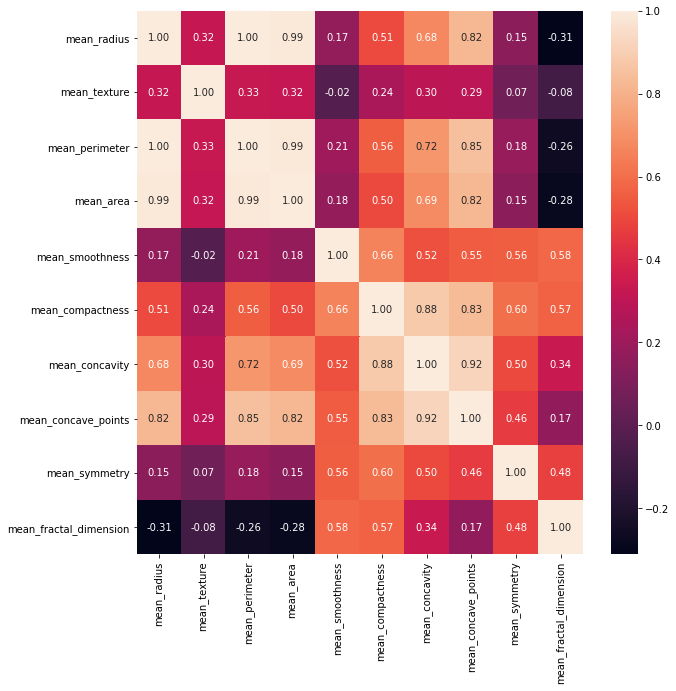

In [17]:
# heatmap을 통해 상관관계 확인
import seaborn as sns
x_corr = X.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(x_corr, annot = True, fmt = '.2f')

**강한 상관관계가 있는 변수들을 적어보세요!
그리고 다중공선성과 그로 인한 문제에 대해 서술해주세요.**

[답] : mean_radius, mean_perimeter<br>
       mean_radius, mean_area<br>
       mean_radius, mean_concave_points<br>
       mean_perimeter, mean_area<br>
       mean_perimeter, mean_concave_points<br>
       mean_area, mean_concave_points<br>
       mean_compactness, mean_concavity<br>
       mean_compactness, maen_concave_points<br>
       mean_concavity, mean_concave_points<br><br>
       다중공선성은 일부 독립변수가 다른 독립변수와의 높은 상관 관계를 가지고 있을 때 발생되는 문제이다.<br>
       이로 인해 회귀 계수의 변동이 심해지고 설명력이 떨어진다.<br>

**강한 상관관계를 가진 변수 중 일부 변수를 선택하여 X 변수를 다시 만들어주세요.**

In [18]:
from sklearn.model_selection import train_test_split
X = df[['mean_radius', 'mean_perimeter', 'mean_area']]

# 학습 데이터와 테스트 데이터 분할
X_tr,X_te,Y_tr,Y_te = train_test_split(X, Y, test_size=0.3, random_state=1)

**로지스틱 회귀 모델 생성 후, test data에 대해 예측을 수행해주세요.**

In [19]:
from sklearn.linear_model import LogisticRegression
lo_model = LogisticRegression().fit(X_tr, Y_tr)
lo_pred = lo_model.predict(X_te)
lo_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1])

**Confusion Matrix를 구하고 이를 이용하여 accuracy, precision, recall을 직접 구해보세요!**

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_te, lo_pred)

array([[ 48,  15],
       [  8, 100]], dtype=int64)

In [21]:
# accuracy
accuracy = ((48 + 100) / (48 + 15 + 8 + 100))
accuracy

0.8654970760233918

In [22]:
# precision
precision = (100 / (15 + 100))
precision

0.8695652173913043

In [23]:
# recall
recall = (100 / (8 + 100))
recall

0.9259259259259259

**회귀계수를 구해보고 그 중 변수 2개를 골라 결과를 해석해보세요! (logit관점/odds관점) **

[답]:
mean_radius가 증가할 때 logit 관점에서 3.897 증가, odds 관점에서 49.258 증가<br>
mean_perimeter가 증가할 때 logit관점 에서 0.455 감소, odds 관점에서 0.634 증가

In [24]:
# 로지스틱 회귀의 회귀계수
lo_model.coef_

array([[ 3.89706532, -0.45512431, -0.02132372]])

In [25]:
print("mean_radius_logit :", lo_model.coef_[0][0])
print("mean_perimeter_logit : ", lo_model.coef_[0][1])
print("mean_radius_odds :", np.exp(lo_model.coef_[0][0]))
print("mean_perimeter_odds : ", np.exp(lo_model.coef_[0][1]))

mean_radius_logit : 3.8970653205016688
mean_perimeter_logit :  -0.45512431064194764
mean_radius_odds : 49.25768127845906
mean_perimeter_odds :  0.6343691042159523


### 주어진 데이터셋을 이용하여 주어진 문제를 해결해주세요.

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## - Feature Scaling

In [27]:
from sklearn.datasets import load_iris

#iris 데이터셋 로드
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


#### 1. iris 데이터셋에 MinMaxScaler를 적용하고 각 칼럼별 평균과 분산을 구하세요.

In [28]:
from sklearn.preprocessing import MinMaxScaler

mms_iris = MinMaxScaler().fit_transform(iris_df)
iris_mms=pd.DataFrame(data=mms_iris, columns=iris.feature_names)
iris_mms

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [29]:
print("feature 평균")
print(iris_mms.mean())
print("feature 분산")
print(iris_mms.var())

feature 평균
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64
feature 분산
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


#### 2. iris 데이터셋에 StandardScaler를 적용하고 각 칼럼별 평균과 분산을 구하세요.

In [30]:
from sklearn.preprocessing import StandardScaler
ss_iris = StandardScaler().fit_transform(iris_df)
iris_ss=pd.DataFrame(data=ss_iris, columns=iris.feature_names)
iris_ss

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [31]:
print("feature 평균")
print(iris_ss.mean())
print("feature 분산")
print(iris_ss.var())

feature 평균
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature 분산
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### 3. normalization과 standardization의 차이점을 설명하세요.

* normalization : 0과 1 사이의 범위로 만든다. 데이터의 위치를 확인할 때 좋음
* standardization : 데이터가 평균에서 얼마나 떨어져있는지 확인

## - Regularization

In [32]:
from sklearn.datasets import load_boston

#boston 집값 데이터셋 로드
boston=load_boston()
boston_price=boston.target
boston_data=boston.data
boston_df=pd.DataFrame(data=boston_data, columns=boston.feature_names)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


#### 4. training data와 test data를 분리해주세요(비율 자유)

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(boston_data, boston_price, test_size=0.3, random_state=1)

#### 5. LinearRegression, Ridge, Lasso 각각의 방법으로 모델을 학습시키고 예측하여 RMSE값을 구해주세요. 세 경우의 RMSE값을 비교해주세요.

In [34]:
# LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
pred = linear_model.predict(X_test)

print("RMSE값 :", np.sqrt(mean_squared_error(Y_test, pred)))

RMSE값 : 4.45323743719816


In [35]:
#Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)
pred = ridge_model.predict(X_test)

print("RMSE값 :", np.sqrt(mean_squared_error(Y_test, pred)))

RMSE값 : 4.397091798887491


In [36]:
#Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
pred = lasso_model.predict(X_test)

print("RMSE값 :", np.sqrt(mean_squared_error(Y_test, pred)))

RMSE값 : 5.503980216349544


* RMSE 비교
    * LinearRegression_RMSE : 4.453
    * Ridge_RMSE : 4.397
    * Lasso_RMSE : 5.504
#### Lasso_RMSE > LinearRegression_RMSE > Ridge_RMSE

# 수고하셨습니다 :D